# 基于统计的语言模型 ngram


In [3]:
# gram的语言模型
sentences =[
    "我爱北京天安门",
    "天安门上太阳升",
    "我爱北京大学",
    "我爱北京的蓝天",
    "我爱北京的白云",
    "我爱蓝天白云",
]
unigrams = {}
bigrams = {}
trigrams = {}
for sentence in sentences:
    sentence = sentence.strip()
    words = list(sentence)
    # 计算unigrams
    for word in words:
        if word not in unigrams:
            unigrams[word] = 0
        unigrams[word] += 1
    # 计算bigrams
    for i in range(len(words)-1):
        bigram = (words[i], words[i+1])
        if bigram not in bigrams:
            bigrams[bigram] = 0
        bigrams[bigram] += 1
    # 计算trigrams
    for i in range(len(words)-2):
        trigram = (words[i], words[i+1], words[i+2])
        if trigram not in trigrams:
            trigrams[trigram] = 0
        trigrams[trigram] += 1
# 计算unigrams的概率
total_unigrams = sum(unigrams.values())
for word in unigrams:
    unigrams[word] /= total_unigrams
# 计算bigrams的概率
total_bigrams = sum(bigrams.values())
for bigram in bigrams:
    bigrams[bigram] /= total_bigrams
# 计算trigrams的概率
total_trigrams = sum(trigrams.values())
for trigram in trigrams:
    trigrams[trigram] /= total_trigrams
# 输出结果
print("Unigrams:")
for word, prob in unigrams.items():
    print(f"{word}: {prob:.4f}")
print("\nBigrams:")
for bigram, prob in bigrams.items():
    print(f"{bigram}: {prob:.4f}")
print("\nTrigrams:")
for trigram, prob in trigrams.items():
    print(f"{trigram}: {prob:.4f}")

Unigrams:
我: 0.1250
爱: 0.1250
北: 0.1000
京: 0.1000
天: 0.1000
安: 0.0500
门: 0.0500
上: 0.0250
太: 0.0250
阳: 0.0250
升: 0.0250
大: 0.0250
学: 0.0250
的: 0.0500
蓝: 0.0500
白: 0.0500
云: 0.0500

Bigrams:
('我', '爱'): 0.1471
('爱', '北'): 0.1176
('北', '京'): 0.1176
('京', '天'): 0.0294
('天', '安'): 0.0588
('安', '门'): 0.0588
('门', '上'): 0.0294
('上', '太'): 0.0294
('太', '阳'): 0.0294
('阳', '升'): 0.0294
('京', '大'): 0.0294
('大', '学'): 0.0294
('京', '的'): 0.0588
('的', '蓝'): 0.0294
('蓝', '天'): 0.0588
('的', '白'): 0.0294
('白', '云'): 0.0588
('爱', '蓝'): 0.0294
('天', '白'): 0.0294

Trigrams:
('我', '爱', '北'): 0.1429
('爱', '北', '京'): 0.1429
('北', '京', '天'): 0.0357
('京', '天', '安'): 0.0357
('天', '安', '门'): 0.0714
('安', '门', '上'): 0.0357
('门', '上', '太'): 0.0357
('上', '太', '阳'): 0.0357
('太', '阳', '升'): 0.0357
('北', '京', '大'): 0.0357
('京', '大', '学'): 0.0357
('北', '京', '的'): 0.0714
('京', '的', '蓝'): 0.0357
('的', '蓝', '天'): 0.0357
('京', '的', '白'): 0.0357
('的', '白', '云'): 0.0357
('我', '爱', '蓝'): 0.0357
('爱', '蓝', '天'): 0.0357
('蓝', 

In [9]:
# 计算句子的概率
cases = [
    "我爱北京天安门",
    "我爱北京的蓝天",
    "我爱蓝天白云",
]
for case in cases:
    case = case.strip()
    words = list(case)
    print(words)
    prob = 1.0
    # 计算unigrams的概率
    for word in words:
        if word in unigrams:
            prob *= unigrams[word]
        else:
            prob *= 0.0
    # 计算bigrams的概率
    for i in range(len(words)-1):
        bigram = (words[i], words[i+1])
        if bigram in bigrams:
            prob *= bigrams[bigram]
        else:
            prob *= 0.0
    # 计算trigrams的概率
    for i in range(len(words)-2):
        trigram = (words[i], words[i+1], words[i+2])
        if trigram in trigrams:
            prob *= trigrams[trigram]
        else:
            prob *= 0.0
    print(f"Probability of '{case}': {prob:}")


['我', '爱', '北', '京', '天', '安', '门']
Probability of '我爱北京天安门': 1.504514343014011e-20
['我', '爱', '北', '京', '的', '蓝', '天']
Probability of '我爱北京的蓝天': 1.504514343014011e-20
['我', '爱', '蓝', '天', '白', '云']
Probability of '我爱蓝天白云': 1.3987281782708383e-19


# 基于学习的语言模型


- 假设类: 所有可能机器学习模型的几何，元素为一个假设。通常是模型架构搭建好，寻找最合适的一组参数
- 归纳偏置: SVM 让两类尽量分得快，人为可控的能对模型产生较大影响的规则，比如LLM 上下文存在关联，CNN 局部感受野， RNN 时间序列 Tf 稀疏注意力 
- 学习范式: 监督学习 无监督学习 强化学习
- 学习算法: 
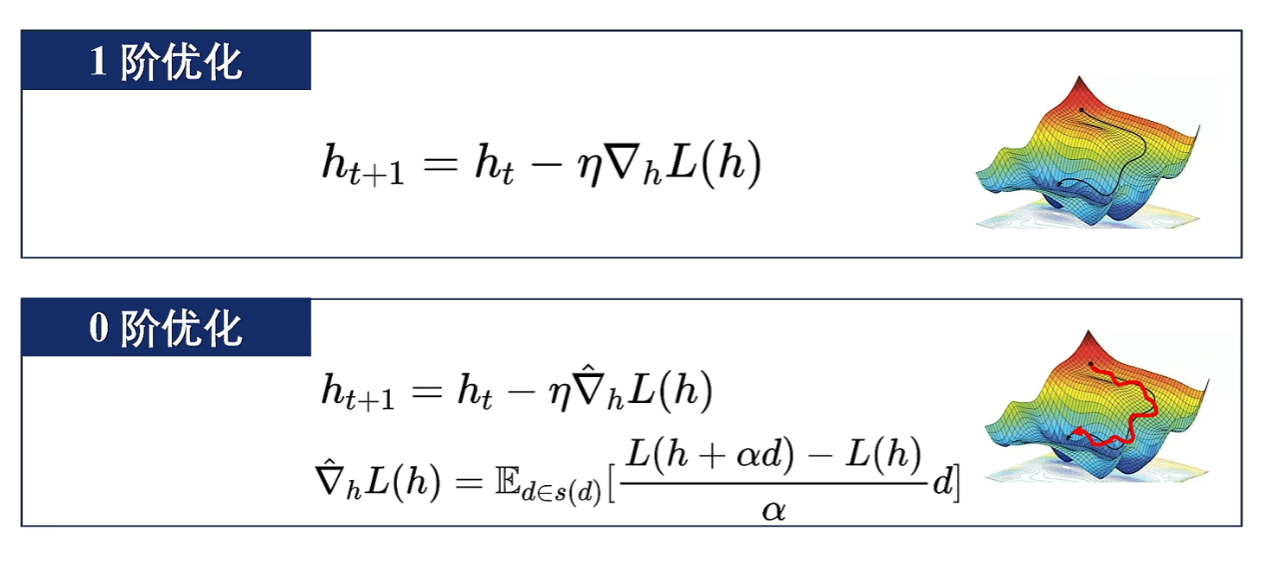
- 泛化误差： 机器学习的目的在于减小泛化误差，即真实误差
- PAC理论 概率近似正确
样本数量足够多时，机器学习可以以一定概率达到近似正确

# RNN 和 Transformer
串行输入对应RNN
并行输入对应Transformer

## RNN
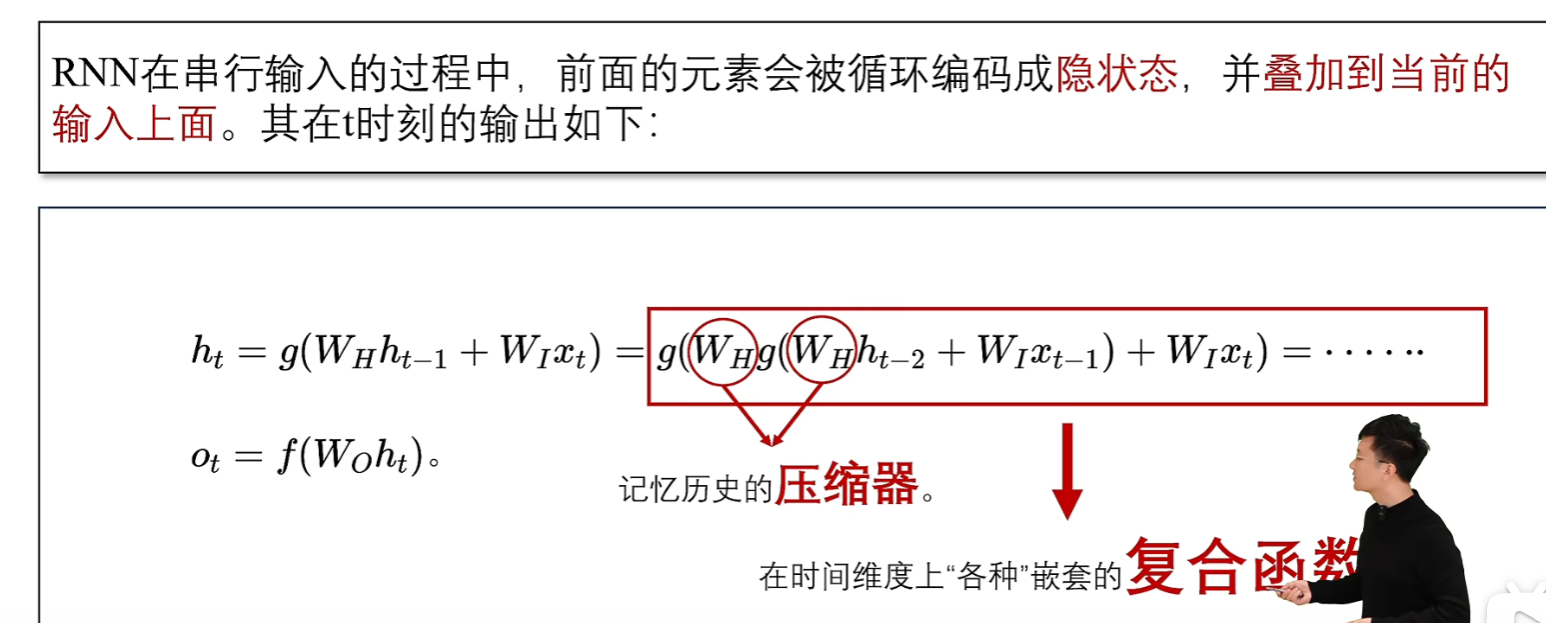

In [40]:
import torch.nn as nn
import torch
import torch.nn.functional as F
# 数据
sentences = [
    "我爱北京天安门",
    "天安门上太阳升",
    "我爱北京大学",
    "我爱北京的蓝天",
    "我爱北京的白云",
    "我爱蓝天白云",
]

# 创建字符到索引的映射
char_to_idx = {char: idx+1 for idx, char in enumerate(set(''.join(sentences)))}  # 从1开始，0留给PAD
char_to_idx['<PAD>'] = 0  # 显式定义填充字符
idx_to_char = {idx: char for char, idx in char_to_idx.items()}  # 创建反向映射

print(char_to_idx)
print(idx_to_char)

# 编码句子
encoded_sentences = []
for sentence in sentences:
    encoded_sentence = [char_to_idx[char] for char in sentence]
    encoded_sentences.append(encoded_sentence)

# 计算最大长度和填充
max_length = max(len(sentence) for sentence in encoded_sentences)
padded_sentences = [sentence + [0] * (max_length - len(sentence)) for sentence in encoded_sentences]
inputs = torch.tensor(padded_sentences, dtype=torch.long)

# 正确生成目标数据（下一个字符预测）
targets = [sentence[1:] + [0] for sentence in encoded_sentences]
targets = torch.tensor([t + [0] * (max_length - len(t)) for t in targets], dtype=torch.long)

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)  # [batch_size, seq_len, embedding_dim]
        x, _ = self.rnn(x)  # [batch_size, seq_len, hidden_dim]
        x = self.fc(x)  # [batch_size, seq_len, vocab_size]
        return x

# 数据加载器
DataLoader = torch.utils.data.DataLoader(
    list(zip(inputs, targets)), batch_size=2, shuffle=True
)

# 模型和训练参数
vocab_size = len(char_to_idx)
embedding_dim = 32  # 增加嵌入维度
hidden_dim = 64     # 增加隐藏层维度
model = RNN(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # 忽略填充字符
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  

# 训练循环
for epoch in range(1000):  # 增加训练轮数
    total_loss = 0
    for inputs, targets in DataLoader:
        optimizer.zero_grad()
        output = model(inputs)  # [batch, seq_len, vocab_size]
        loss = criterion(output.reshape(-1, vocab_size), targets.reshape(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    if (epoch + 1) % 50 == 0:  # 每50轮打印一次
        print(f"Epoch [{epoch + 1}/1000], Loss: {total_loss:.4f}")

# 评估函数
model.eval()
def evalcase(sentence):
    encoded_sentence = [char_to_idx[char] for char in sentence]
    padded_sentence = torch.tensor(
        encoded_sentence + [0] * (max_length - len(encoded_sentence)),
        dtype=torch.long
    ).unsqueeze(0)
    with torch.no_grad():
        output = model(padded_sentence)
        probabilities = F.softmax(output[:, -1], dim=-1)  # 只取最后一个时间步的预测
        _, predicted = torch.max(probabilities, dim=1)
    
    # 使用反向映射
    predicted_char = idx_to_char.get(predicted.item(), '')
    return predicted_char

cases = [
    "我爱北京天",
    "我爱北京的蓝",
    "我爱蓝天白",
    "我"
]
for case in cases:
    evaled_sentence = evalcase(case)
    print(f"Input: {case}, Predicted next: {evaled_sentence}")

{'爱': 1, '太': 2, '白': 3, '天': 4, '升': 5, '大': 6, '北': 7, '门': 8, '蓝': 9, '学': 10, '阳': 11, '的': 12, '安': 13, '云': 14, '我': 15, '京': 16, '上': 17, '<PAD>': 0}
{1: '爱', 2: '太', 3: '白', 4: '天', 5: '升', 6: '大', 7: '北', 8: '门', 9: '蓝', 10: '学', 11: '阳', 12: '的', 13: '安', 14: '云', 15: '我', 16: '京', 17: '上', 0: '<PAD>'}
Epoch [50/1000], Loss: 1.0839
Epoch [100/1000], Loss: 0.8281
Epoch [150/1000], Loss: 0.7656
Epoch [200/1000], Loss: 0.7475
Epoch [250/1000], Loss: 0.7361
Epoch [300/1000], Loss: 0.7424
Epoch [350/1000], Loss: 0.7281
Epoch [400/1000], Loss: 0.7386
Epoch [450/1000], Loss: 0.7365
Epoch [500/1000], Loss: 0.7330
Epoch [550/1000], Loss: 0.7318
Epoch [600/1000], Loss: 0.7303
Epoch [650/1000], Loss: 0.7176
Epoch [700/1000], Loss: 0.7329
Epoch [750/1000], Loss: 0.7153
Epoch [800/1000], Loss: 0.7326
Epoch [850/1000], Loss: 0.7146
Epoch [900/1000], Loss: 0.7295
Epoch [950/1000], Loss: 0.7161
Epoch [1000/1000], Loss: 0.7281
Input: 我爱北京天, Predicted next: 上
Input: 我爱北京的蓝, Predicted next: 白
I